# Gen AI Track Rice Datathon 2025

Objective: Predicting Vehicle Inventory for 2025

Steps:

 A. Feature Selection / Data Cleaning

B.Data Splitting / Pre-Processing

C. Model Training and Testing

D. Model Evaluation - Assess models using 
    metrics such as accuracy, precision, recall and F1 score

Data Dictionary

- Date: The year of the inventory

- Vehicle Category: The category of the vehicle

- GVWR Class: Gross Vehicle Weight Rating

- Fuel Type: The type of fuel (gas, electric, diesel)

- Model Year: Model Year of the vehicle

- Fuel Technology (ICE, Hybrid, Electric)

- Electric Mileage: How far the vehicle travels on a single charge

- Number of Vehicles Registered at the Same Address: How many vehicles are registered at the same address.

- Region: How the count is aggregated (i.e. for the entire state / or by zip code)

- Vehicle Population: The total vehicle population

In [8]:
#pip install pandas
#pip install numpy
#pip install scipy
#pip install sklearn
#pip install flaml
#pip install xgboost
#pip install lightgbm
#pip install sweetviz
#pip install shap
#pip install matplotlib
#pip install seaborn
#pip install plotly
#pip install catboost

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import os
training = pd.read_excel('training.xlsx')
scoring = pd.read_excel("scoring.xlsx")
caliData = pd.read_excel(r"C:\Users\user\Documents\Rice-Datathon-2025\cailutility2.xlsx", sheet_name='data')
caliData

,year,Average of avgPriceGasolineUnleadedRegular,Average of avgGasPerThermUSD,Average of avgElecKWHUSD,Average of avgLowSulfurDieselUsdPerGallon
0,1978,0.716917,0.203000,0.041000,NaN
1,1979,0.960750,0.264667,0.040167,NaN
2,1980,1.309833,0.453833,0.067167,NaN
3,1981,1.435917,0.457667,0.077417,NaN
4,1982,1.353250,0.498333,0.093333,NaN
5,1983,1.291583,0.475667,0.076333,NaN
6,1984,1.302083,0.535417,0.084833,NaN
7,1985,1.252083,0.502182,0.098636,NaN
8,1986,0.975750,0.465000,0.084833,NaN
9,1987,0.955000,0.471500,0.082583,NaN


In [10]:
caliData = caliData.rename(columns={
    'Average of avgPriceGasolineUnleadedRegular': 'avgPriceGasolineUnleadedRegular',
    'Average of avgGasPerThermUSD': 'avgGasPerThermUSD',
    'Average of avgElecKWHUSD': 'avgElecKWHUSD',
    'Average of avgLowSulfurDieselUsdPerGallon': 'avgLowSulfurDieselUsdPerGallon',
    })

#### Relevant Social Impact / Real World Value

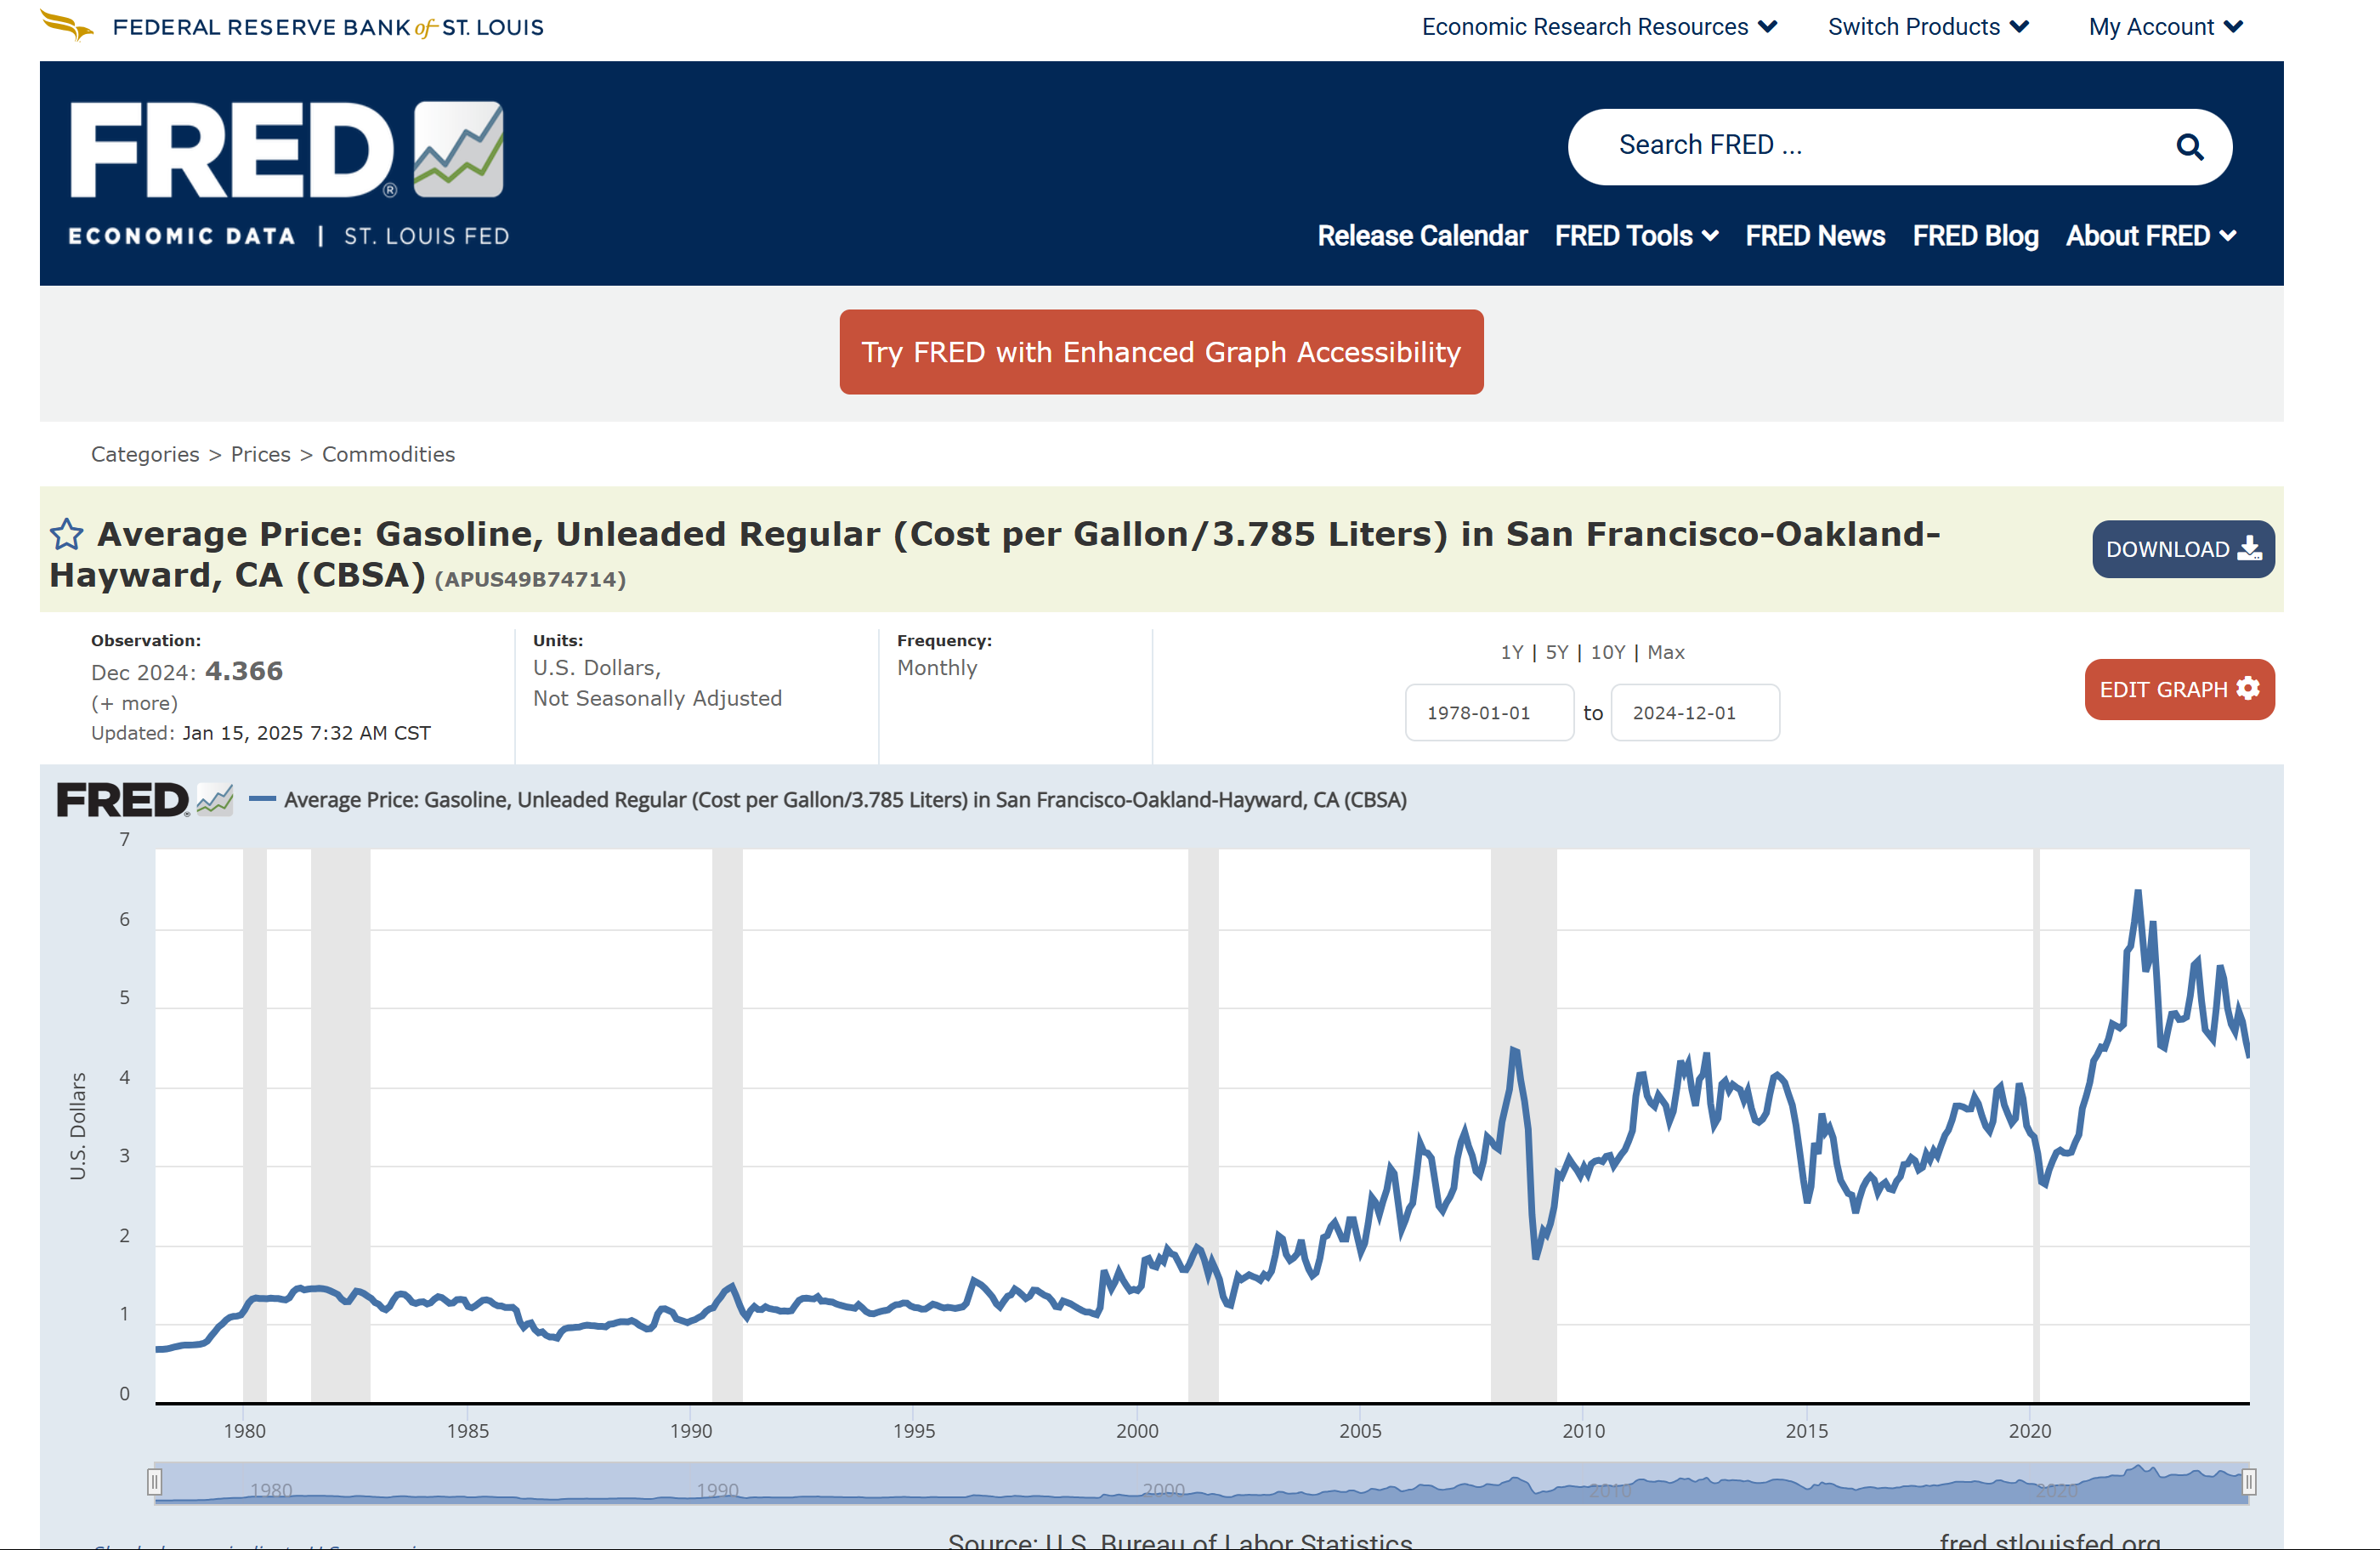

In [11]:
training = training.rename(columns={
    'Date': 'year',
    'Vehicle Category': 'vehicleCategory',
    'GVWR Class': 'gvwrClass',
    'Fuel Type': 'fuelType',
    "Model Year": "modelYear",
    "Fuel Technology": "fuelTechnology",
    "Electric Mile Range": "electricMileRange",
    "Number of Vehicles Registered at the Same Address": "numVehiclesReg",
    "Vehicle Population:": "vehiclePopulation"
})

scoring = scoring.rename(columns={
    'Date': 'year',
    'Vehicle Category': 'vehicleCategory',
    'GVWR Class': 'gvwrClass',
    'Fuel Type': 'fuelType',
    'Model Year': 'modelYear',
    'Fuel Technology': 'fuelTechnology',
    'Electric Mile Range': 'electricMileRange',
    'Number of Vehicles Registered at the Same Address': 'numVehiclesReg',
    'Vehicle Population:': 'vehiclePopulation'
})

training = training.drop(columns=['Region'])
scoring = scoring.drop(columns=['Region'])

caliData = caliData.rename(columns={"year": "modelYear"})

#### Exploratory Data Analysis

In [12]:
#Get the initial statistics of the training dataset
training.describe()

,year,modelYear,Vehicle Population
count,41053.000000,40450.000000,41053.000000
mean,2020.985312,2002.075871,3463.929506
std,1.398470,13.462658,18833.839302
min,2019.000000,1975.000000,1.000000
25%,2020.000000,1991.000000,5.000000
50%,2021.000000,2003.000000,39.000000
75%,2022.000000,2014.000000,390.000000
max,2023.000000,2026.000000,395883.000000


In [13]:
print(training.isnull().sum())    

year                    0
vehicleCategory         0
gvwrClass               0
fuelType                0
modelYear             603
fuelTechnology          0
electricMileRange       0
numVehiclesReg          0
Vehicle Population      0
dtype: int64


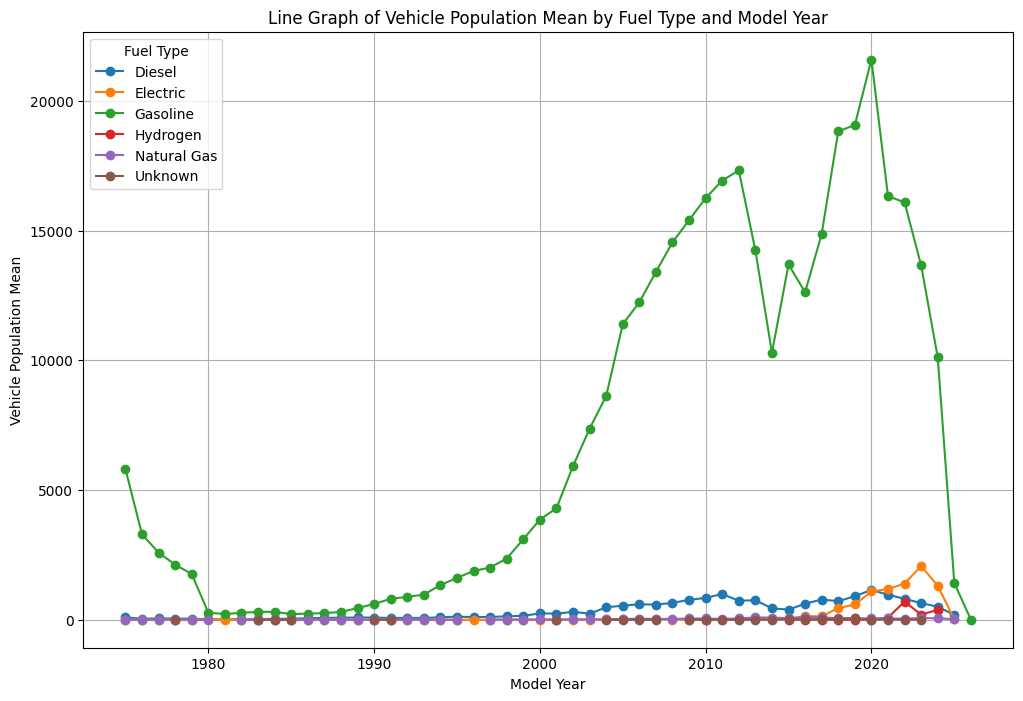

In [14]:
grouped_data = training.groupby(['fuelType', 'modelYear'])['Vehicle Population'].mean().unstack()

plt.figure(figsize=(12, 8))
for fuel_type in grouped_data.index:
    plt.plot(grouped_data.columns, grouped_data.loc[fuel_type], marker='o', label=fuel_type)

plt.title("Line Graph of Vehicle Population Mean by Fuel Type and Model Year")
plt.xlabel("Model Year")
plt.ylabel("Vehicle Population Mean")
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

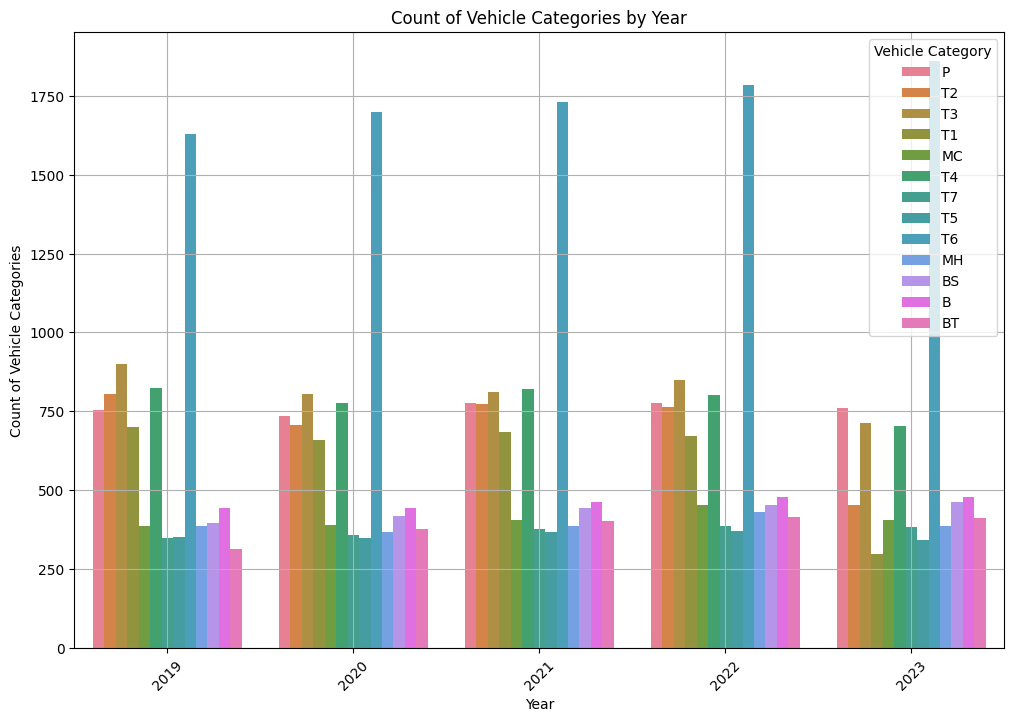

In [15]:
plt.figure(figsize=(12, 8)),
sns.countplot(data=training, x='year', hue='vehicleCategory', dodge=True)
plt.title('Count of Vehicle Categories by Year')
plt.xlabel('Year')
plt.ylabel('Count of Vehicle Categories')
plt.legend(title='Vehicle Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A Kernel Density Estimate (KDE) plot is a smooth representation of the data's distribution.

The peak of the curve, represents the value with the highest likelhood of occuring.

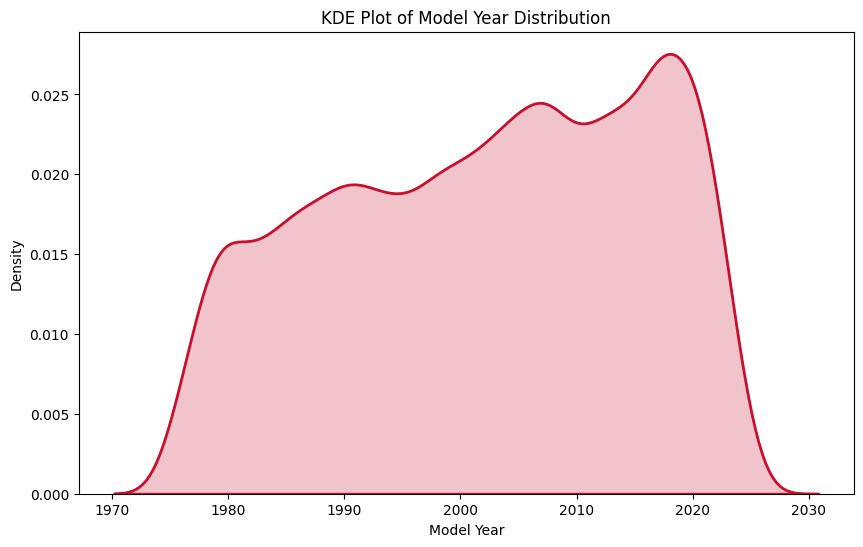

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(training['modelYear'], fill=True, color="#C8102E", linewidth=2)
plt.xlabel("Model Year")
plt.ylabel("Density")
plt.title("KDE Plot of Model Year Distribution")
plt.show()

Our KDE plot reveals a wide distribution, suggesting that the data does not have a concentration of vehicles from a single model year. Notably, the plot shows an increasing skew toward newer model years. This is expected, as vehicles tend to have a finite lifespan; over time, they are more likely to be involved in accidents, experience significant mechanical failures, or wear out, which could shorten their lifespan.

In [19]:
# Update missing values in Model Year to use mode from Fuel Type, Fuel Technology subcategories
mode_per_group = training.groupby(["fuelType", "fuelTechnology"])['modelYear'].transform(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else x)
training['modelYear'] = training['modelYear'].fillna(mode_per_group)


In [20]:
# Update unknown values in Electric Mile Range to use mode from Fuel Type, Fuel Technology subcategories
mode_electricMileRange = training.groupby(["year", "vehicleCategory", "fuelType", "fuelTechnology"])['electricMileRange'].transform(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else x)
training['electricMileRange'] = training['electricMileRange'].where(training['electricMileRange'] != 'Unknown', mode_electricMileRange)


Missing Model Year data was imputed by taking the mode of vehicles with the same fuel type and fuel technology. For example, if the missing year had a fuel type of electric and fuel technology of BEV (electric car) then the mode of all vehicles with both these parameters are then taken and imputed into our dataset.

In [21]:
# Update missing values in Model Year to use mode from Fuel Type, Fuel Technology subcategories
mode_per_group_scoring = scoring.groupby(["fuelType", "fuelTechnology"])['modelYear'].transform(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else x)
scoring['modelYear'] = scoring['modelYear'].fillna(mode_per_group_scoring)
# Update unknown values in Electric Mile Range to use mode from Fuel Type, Fuel Technology subcategories
mode_electricMileRange_scoring = scoring.groupby(["year", "vehicleCategory", "fuelType", "fuelTechnology"])['electricMileRange'].transform(lambda x: pd.Series.mode(x).iloc[0] if not x.mode().empty else x)
scoring['electricMileRange'] = scoring['electricMileRange'].where(scoring['electricMileRange'] != 'Unknown', mode_electricMileRange_scoring)


Unknown Electric Mile Range data was imputed by taking the mode of vehicles with the same fuel type, fuel technology, Date, and Vehicle Category. This follows the same format as the modelYear imputation

#### OneHotEncoding 

We will be using One-Hot Encoding on the categorical features like, fuelType, electricMileRange, numVehiclesReg, because it will enable us to use these features in our machine learning models later on. This is important since most machine learning models require numerical inputs. One-hot encoding helps us avoid introducing ordinal relationships that might arise from numerically encoding categorical variables, which could mislead the model into thinking there's an inherent order. The one-hot encoder will create new columns for each unique category and convert the values into binary vectors, allowing us to then input them into our ML models.

In [22]:
training = pd.get_dummies(training,
                            columns=["gvwrClass", "vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange","numVehiclesReg"],
                            prefix=["gvwrClass", "vehicleCategory", "fuelType", "fuelTech", "electricMileRange", "numVehiclesReg" ],
                            prefix_sep="_")



y_training = training['Vehicle Population']

training['vehicleAge'] = training['year'] - training['modelYear']
training = training.drop(columns=['Vehicle Population'])


In [23]:
scoring = pd.get_dummies(scoring,
                            columns=["gvwrClass", "vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange","numVehiclesReg"],
                            prefix=["gvwrClass", "vehicleCategory", "fuelType", "fuelTech", "electricMileRange", "numVehiclesReg" ],
                            prefix_sep="_")

y_scoring = scoring['Vehicle Population']
training = pd.merge(training, caliData, on="modelYear", how="left")
scoring = pd.merge(scoring, caliData, on="modelYear", how="left")
scoring['vehicleAge'] = scoring['year'] - scoring['modelYear']

scoring = scoring.drop(columns=['Vehicle Population'])


#### Gen-AI Exploratory Data Analysis


In [24]:
import sweetviz as sv

# Generate a Sweetviz report for the training dataset
report = sv.analyze(training)

# Display the report
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


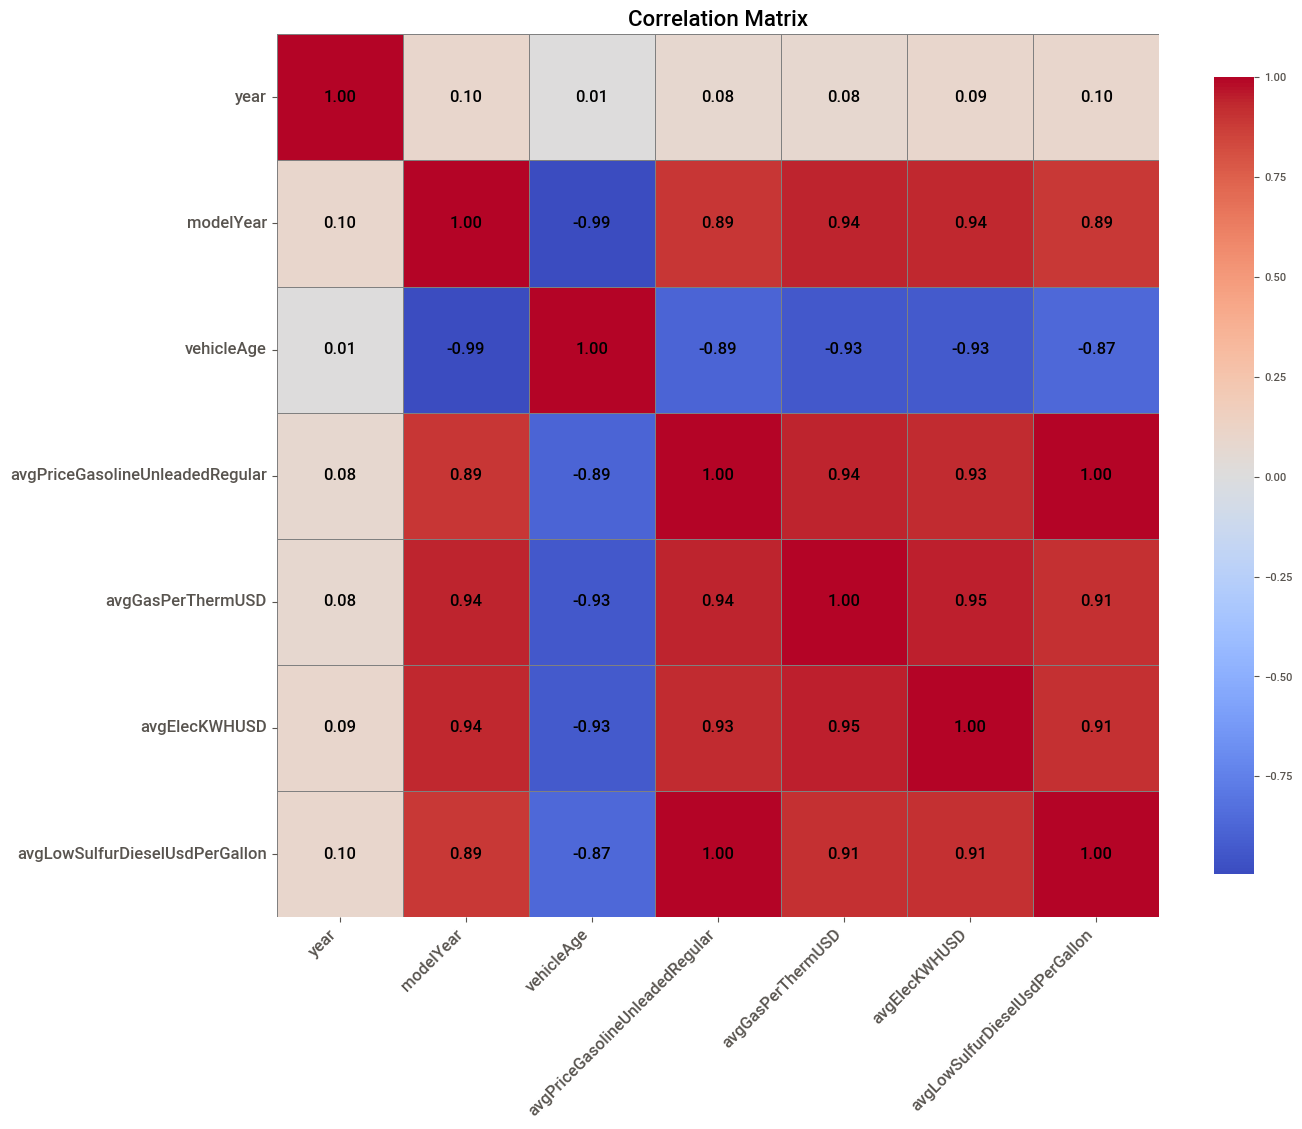

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for non-numeric columns
numeric_cols = training.select_dtypes(include=['number']).columns

# Compute the correlation matrix using only numeric columns
corr_matrix = training[numeric_cols].corr()

# Set the figure size
plt.figure(figsize=(14, 12))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,        # Display correlation values
    fmt=".2f",         # Format the numbers to 2 decimal places
    cmap='coolwarm',   # Choose the color palette
    linewidths=0.5,    # Add separation between the cells
    linecolor='gray',  # Set line color between cells
    cbar_kws={"shrink": 0.8},  # Control the color bar size
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},  # Style for annotations
    xticklabels=corr_matrix.columns,  # Rotate the x-axis labels
    yticklabels=corr_matrix.columns,  # Rotate the y-axis labels
    square=True        # Make the heatmap square-shaped
)

# Improve the aesthetics
plt.title("Correlation Matrix", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust position
plt.yticks(rotation=0, fontsize=12)               # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


The majority of the training data is categorical which potentially reduces their impact on the regression model. This is supported by the fact that the most important features are numerical

In [26]:
training

,year,modelYear,gvwrClass_1,gvwrClass_2,gvwrClass_3,gvwrClass_4,gvwrClass_5,gvwrClass_6,gvwrClass_7,gvwrClass_8,...,numVehiclesReg_1,numVehiclesReg_2,numVehiclesReg_3,numVehiclesReg_Unknown,numVehiclesReg_≥4,vehicleAge,avgPriceGasolineUnleadedRegular,avgGasPerThermUSD,avgElecKWHUSD,avgLowSulfurDieselUsdPerGallon
0,2019,2020.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,-1.0,3.118000,1.615583,0.234917,3.118000
1,2020,2020.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,0.0,3.118000,1.615583,0.234917,3.118000
2,2021,2020.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,1.0,3.118000,1.615583,0.234917,3.118000
3,2019,2019.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,0.0,3.705417,1.486333,0.217333,3.705417
4,2019,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,1.0,3.641833,1.449750,0.209750,3.641833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,1983.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,36.0,1.291583,0.475667,0.076333,NaN
41049,2019,1980.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,39.0,1.309833,0.453833,0.067167,NaN
41050,2019,1978.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,41.0,0.716917,0.203000,0.041000,NaN
41051,2019,1976.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,43.0,NaN,NaN,NaN,NaN


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training, y_training, test_size=0.2, random_state=27)

In [28]:
if 'fuelType_Unknown' in X_train.columns and 'fuelType_Unknown' not in scoring.columns:
    scoring['fuelType_Unknown'] = 0
    
if 'numVehiclesReg_Unknown' in X_train.columns and 'numVehiclesReg_Unknown' not in scoring.columns:
    scoring['numVehiclesReg_Unknown'] = 0

In [29]:
from flaml import AutoML

# Initialize AutoML
automl = AutoML()

# Define FLAML settings. Adjust time_budget (in seconds) and metric as needed.
automl_settings = {
    "time_budget": 360,            # total running time in seconds (adjust based on your dataset)
    "metric": 'rmse',             # metric for regression; for classification you might use 'accuracy' or another metric
    "task": 'regression',         # specify the task type: 'regression' or 'classification'
    "log_file_name": "flaml.log", # optional: log file to save training logs
}

# Fit AutoML on the training data
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl.logger: 02-02 02:29:15] {1728} INFO - task = regression
[flaml.automl.logger: 02-02 02:29:15] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 02-02 02:29:15] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 02-02 02:29:15] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 02-02 02:29:15] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-02 02:29:15] {2393} INFO - Estimated sufficient time budget=860s. Estimated necessary time budget=6s.
[flaml.automl.logger: 02-02 02:29:15] {2442} INFO -  at 0.5s,	estimator lgbm's best error=16127.3761,	best estimator lgbm's best error=16127.3761
[flaml.automl.logger: 02-02 02:29:15] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-02 02:29:16] {2442} INFO -  at 0.6s,	estimator lgbm's best error=16127.3761,	best estimator lgbm's best error=16127.3761
[flaml.automl.logger: 02-0

In [30]:
# Print best hyperparameters
print("Best hyperparameters found:", automl.best_config)

Best hyperparameters found: {'n_estimators': 484, 'num_leaves': 101, 'min_child_samples': 3, 'learning_rate': 0.028786855755827394, 'log_max_bin': 8, 'colsample_bytree': 0.989521951242629, 'reg_alpha': 0.02465352850408109, 'reg_lambda': 0.3846632019512515}


In [31]:
from sklearn.metrics import mean_squared_error
y_pred = automl.predict(X_test)

# Calculate RMSE (note: mean_squared_error with squared=False gives RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Optionally, you can also compute R² (coefficient of determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

RMSE: 1873.6815530613264
R²: 0.9903724200154967


c:\Users\user\anaconda3\envs\aleks1\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
scoring = scoring.reindex(columns=training.columns)

In [33]:
ypred_2 = automl.predict(scoring)

In [34]:
# Calculate RMSE (note: mean_squared_error with squared=False gives RMSE)
rmse = mean_squared_error(y_scoring, ypred_2, squared=False)
print("RMSE:", rmse)

# Optionally, you can also compute R² (coefficient of determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_scoring, ypred_2)
print("R²:", r2)

RMSE: 4509.850666464273
R²: 0.9463274953384226


c:\Users\user\anaconda3\envs\aleks1\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Without the California data included we scored as high as 1700 RMSE, however we feel including the historical utility price data helps our model be more generalizable.

on average, the model's predictions deviate from the true values by about 4509.85 units.The lower the RMSE, the better the model, since it indicates less error in the predictions. 94.63% of the variance in the dependent variable can be explained by the model. This suggests a very good fit since a value close to 1 indicates that the model is performing well.

In [35]:
# Print full best model pipeline
print("Best model pipeline:", automl.model)

Best model pipeline: <flaml.automl.model.LGBMEstimator object at 0x00000224F0B707F0>


California Dataset source: https://fred.stlouisfed.org/series/APUS49B74714